<a href="https://colab.research.google.com/github/lhfranca/Documentation/blob/main/TrabalhoProgAlg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programação e Algoritmos - leitura de um QR code

<div class="alert alert-success">
<h2>Instruções</h2>

<ul>
    <li>O trabalho pode ser feito individualmente ou em duplas.
    <li>A avaliação será durante a aula de <strong>22/10/2020</strong>.
    <li>Aqueles que quiserem agendar outro dia e horário para a avaliação do trabalho, devem fazê-lo através do e-mail <a href="mailto:rfcantao@ufscar.br">rfcantao@ufscar.br</a>
    <li>Cada trabalho será apresentado por seu(s) autor(es) via compartilhamento de tela na plataforma Google Meet, em um tempo máximo de 10 minutos.
    <li>A documentação do projeto deverá ser feita no próprio notebook Jupyter.
</ul>
</div>

## Entrega

Será criada uma função que, dado um QR Code no formato especificado abaixo, ela faz a decodificação e retorna o conteúdo do QR Code em uma string.

### Requisitos

- A função deverá se chamar `decodifica_qr_code`.
- Seu único argumento de entrada deve ser a matriz representando o QR Code (mais sobre o padrão usado na sequência).
- Seu único argumento de saída deve ser a mensagem embutida no QR Code.

## Pacotes

Carregue os pacotes a seguir para poder rodar as funções fornecidas neste notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import string
%matplotlib notebook

## O QR Code usado neste trabalho

O QR Code (abreviação de _Quick Response Code_, ou "código de resposta rápida") é uma forma de código de barras bidimensional. Existem atualmente mais de 5 padrões de QR Code no mundo, mas devido à complexidade de construção e implementação destes padrões, vamos usar um criado especialmente para este trabalho!

Para criar a padronagem para o QR Code usaremos uma matriz de zeros e uns. Esta matriz pode tanto ser uma lista de listas simples (veja a aula `4_loops.ipynb`) ou uma matriz NumPy (aula `9_NumPy.ipynb`, em breve).

Veja o exemplo a seguir, que representa um quadrado com um ponto no meio, típico de QR Codes:

In [2]:
# bit 1 = cor preta
# bit 0 = cor branca

qr_mini = [[1, 1, 1, 1, 1],
           [1, 0, 0, 0, 1],
           [1, 0, 1, 0, 1],
           [1, 0, 0, 0, 1],
           [1, 1, 1, 1, 1]]

### Visualização do QR Code

Para visualizar o QR Code use a função `mostra_qr_code()` abaixo. Veja o exemplo que mostra o QR Code definido acima. __Não se preocupe em entender esta função!__ Ela está aqui apenas para auxiliar seu desenvolvimento do projeto.

In [3]:
# Não se preocupe em entender esta função! Ela está aqui
# pela utilidade!

def mostra_qr_code(qr, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(3, 3))
        
    ax.imshow(qr, cmap='binary', vmin=0, vmax=1)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.tight_layout()

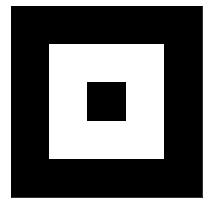

In [4]:
# Exibe o QR Code de exemplo
mostra_qr_code(qr_mini)

## Codificação dos caracteres

O dicionário abaixo (aula `7_dicionários.ipynb`) associa cada caractere disponível - letras, dígitos e alguns caracteres de pontuação e especiais - com sua representação no código QR. Cada caractere corresponde a uma matriz $3\times 2$ (veja a Figura na sequência).

> __Importante!__ Não use acentos!

In [5]:
c2m = {'a': [[0, 0], [0, 0], [0, 0]], 'b': [[0, 0], [0, 0], [0, 1]], 'c': [[0, 0], [0, 0], [1, 0]],
       'd': [[0, 0], [0, 0], [1, 1]], 'e': [[0, 0], [0, 1], [0, 0]], 'f': [[0, 0], [0, 1], [0, 1]],
       'g': [[0, 0], [0, 1], [1, 0]], 'h': [[0, 0], [0, 1], [1, 1]], 'i': [[0, 0], [1, 0], [0, 0]],
       'j': [[0, 0], [1, 0], [0, 1]], 'k': [[0, 0], [1, 0], [1, 0]], 'l': [[0, 0], [1, 0], [1, 1]],
       'm': [[0, 0], [1, 1], [0, 0]], 'n': [[0, 0], [1, 1], [0, 1]], 'o': [[0, 0], [1, 1], [1, 0]],
       'p': [[0, 0], [1, 1], [1, 1]], 'q': [[0, 1], [0, 0], [0, 0]], 'r': [[0, 1], [0, 0], [0, 1]],
       's': [[0, 1], [0, 0], [1, 0]], 't': [[0, 1], [0, 0], [1, 1]], 'u': [[0, 1], [0, 1], [0, 0]],
       'v': [[0, 1], [0, 1], [0, 1]], 'w': [[0, 1], [0, 1], [1, 0]], 'x': [[0, 1], [0, 1], [1, 1]],
       'y': [[0, 1], [1, 0], [0, 0]], 'z': [[0, 1], [1, 0], [0, 1]], '0': [[0, 1], [1, 0], [1, 0]],
       '1': [[0, 1], [1, 0], [1, 1]], '2': [[0, 1], [1, 1], [0, 0]], '3': [[0, 1], [1, 1], [0, 1]],
       '4': [[0, 1], [1, 1], [1, 0]], '5': [[0, 1], [1, 1], [1, 1]], '6': [[1, 0], [0, 0], [0, 0]],
       '7': [[1, 0], [0, 0], [0, 1]], '8': [[1, 0], [0, 0], [1, 0]], '9': [[1, 0], [0, 0], [1, 1]],
       ' ': [[1, 0], [0, 1], [0, 0]], '@': [[1, 0], [0, 1], [0, 1]], '/': [[1, 0], [0, 1], [1, 0]],
       ':': [[1, 1], [0, 0], [1, 1]], '+': [[1, 0], [1, 0], [0, 0]], '-': [[1, 0], [1, 0], [0, 1]],
       '*': [[1, 0], [1, 0], [1, 0]], '.': [[1, 0], [1, 0], [1, 1]], '%': [[1, 0], [1, 1], [0, 0]],
       '&': [[1, 0], [1, 1], [0, 1]], '#': [[1, 0], [1, 1], [1, 0]], '!': [[1, 0], [1, 1], [1, 1]],
       '?': [[1, 1], [0, 0], [0, 0]], ',': [[1, 1], [0, 0], [0, 1]], ';': [[1, 1], [0, 0], [1, 0]],
       '=': [[1, 1], [0, 1], [0, 0]], '[': [[1, 1], [0, 1], [0, 1]], ']': [[1, 1], [0, 1], [1, 0]],
       '{': [[1, 1], [0, 1], [1, 1]], '}': [[1, 1], [1, 0], [0, 0]], '(': [[1, 1], [1, 0], [0, 1]],
       ')': [[1, 1], [1, 0], [1, 0]], '$': [[1, 1], [1, 0], [1, 1]], '\\': [[1, 1], [1, 1], [0, 0]],
       '|': [[1, 1], [1, 1], [0, 1]], '<': [[1, 1], [1, 1], [1, 0]], '>': [[1, 1], [1, 1], [1, 1]]}

![Mapa de caracteres](mapa.png)

Para exemplificar, vamos ver como é representada a letra "n":

In [6]:
# Use o nome do dicionário e o caracter desejado entre aspas
c2m['n']

[[0, 0], [1, 1], [0, 1]]

Para exemplificar melhor, a letra "n" é representada pela matriz
$$
A = \begin{bmatrix} 0 & 0 \\ 1 & 1 \\ 0 & 1 \end{bmatrix},
$$
ou, se preferir visualizar somente a letra "n", use a função `mostra_qr_code()`:

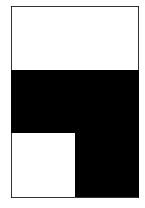

In [7]:
mostra_qr_code(c2m['n'])

## A mensagem secreta

O QR Code abaixo contém uma mensagem secreta. Na verdade é parte de uma série de livros bastante conhecida. Seu trabalho será escrever um programa que decifre esse QR Code!

In [8]:
qr = np.array([[1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1],
               [1,0,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,0,1,0,0,0,1,1,1,0,1,0,0],
               [1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1],
               [1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0],
               [1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1],
               [1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0],
               [0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0],
               [1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,1,1],
               [0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0],
               [1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1],
               [1,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1],
               [1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
               [0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1],
               [0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1],
               [0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0],
               [0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,0,0,1,1,1,1,1],
               [0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0],
               [0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0],
               [0,0,0,1,1,1,1,1,0,0,0,1,0,1,1,1,0,1,1,1,0,1,0,0,1,1,0,1,1,1],
               [0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1],
               [0,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0],
               [0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1],
               [0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0],
               [0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1],
               [0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0],
               [0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0],
               [0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0],
               [1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0],
               [1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0]])

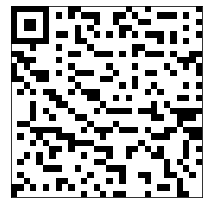

In [9]:
mostra_qr_code(qr)

## Informações importantes!

- A matriz que representa a mensagem acima tem dimensão $30\times 30$.
- O marcador de QR Code no canto superior esquerdo ocupa $6\times 6$ desta matriz e não representa informação alguma (pode ser desconsiderado).
- De acordo com o dicionário de codificação dos caracteres, cada um deles ocupa $3\times 2$ de espaço no QR Code.

# **Vamos lá!** 
Primeiramente precisamos pensar no que precisamos, para assim buscar a solução.

> 



  Objetivo:
    Obviamente decodificar a mensagem.

> 


Como?
         Separando a matriz em elementos que possam ser comparados com o dicionário.
        Para isso, criamos um "molde" que percorre toda a matriz e retorna em pares ordenados, o qual chamamos de "par_ordenado_i", sendo i de 1 a 3.
        Após pegar 3 pares ordenados, agrupamos ele de uma maneira que ficasse igual ao valor do dicionário.
        Com essa atribuição da "matriz_3x2", nome dado ao agrupamento dos pares ordenados, foi possível percorrer o dicionário e retornar a chave dado o valor contido na "matriz_3x2". Para isso, utilizamos o método .items() que retorna uma lista com chave:valor, e com base no valor conseguimos ir somando o resultado de sua chave e imprimir em apenas uma linha.


In [10]:
def decodifica_qr_code(y):

    mensagem = ""
    for l in range(0,30, 3): #da primeira linha até a última, com incrementos de 3.
      for c in range(0,30, 2): #da primeira coluna até a última, com incrementos de 2.
        if l < 6 and c < 6: #ignorando a matrix 6x6
          ignorar = "ignorar"
        else:                                     #
          par_ordenado_1 = [ qr[l][c], qr[l][c+1]]
          par_ordenado_2 = [ qr[l+1][c], qr[l+1][c+1]]
          par_ordenado_3 = [ qr[l+2][c], qr[l+2][c+1]]  
          matriz_3x2 = [ par_ordenado_1, par_ordenado_2, par_ordenado_3]


          for chave, valor in c2m.items():
            if matriz_3x2 == valor:
              mensagem = mensagem + chave
    print(mensagem)


In [11]:
decodifica_qr_code(qr)

eu nao temerei. eu enfrentarei meu medo. permitirei que ele passe atraves de mim. por onde o medo passou, nao havera mais nada. so eu restarei.a


# ***Explicando um pouco mais da nossa solulução.***

> **Utilização do for**

O for é uma maneira muito eficiente de percorer uma lista quando se conhece o seu tamanho e ele é limitado. Através desse método conseguimos criar uma maneira de percorrer a lista tanto verticalmente quando horizontalemente, pois fizemos esse esquema de "l" e "c", sendo linhas e colunas respectivamente. Um pouco mais abaixo, já no momento de relacionar os dados previamente trabalhados com o dicionário, também utilizamos o for, para percorrer os valores e caso fosse encontrado uma chave, ele nos retornasse esta chave.

>**Utilização do if/else**

Para ignorarmos a matriz 6x6 contida no canto superior esquerdo da mensagem secreta, utilizamos o método condicional "if", para ignorar as colunas e linhas referente a essa matriz e no else, indatamos nossa formula de agrupamento dos pares ordenados. Logo abaixo, quando precisamos relacionar os dados com o dicionário, utilizamos o "if" para retornar a chave caso a matriz agrupada seja igual ao valor, como esta dentro de um for, isso foi feito para toda a matriz.




